In [21]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


import libraries 

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import string




In [49]:
data = pd.read_csv("/workspaces/codespaces-jupyter/data/Reviews.csv")

In [50]:
data['Text_cleaned'] = data['Text'].str.lower()

data understanding

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69998 entries, 0 to 69997
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Score         69998 non-null  int64 
 1   Text          69998 non-null  object
 2   Text_cleaned  69998 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [52]:
data.shape

(69998, 3)

In [53]:
data

,Score,Text,Text_cleaned
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...
...,...,...,...
69993,5,Lambert Kay makes the best dog shampoo and con...,lambert kay makes the best dog shampoo and con...
69994,5,I have searched for a conditioner for my Yorks...,i have searched for a conditioner for my yorks...
69995,5,I've been using this for years. While I have ...,i've been using this for years. while i have ...
69996,5,This is the best rinse for dogs that we have e...,this is the best rinse for dogs that we have e...


EDA 

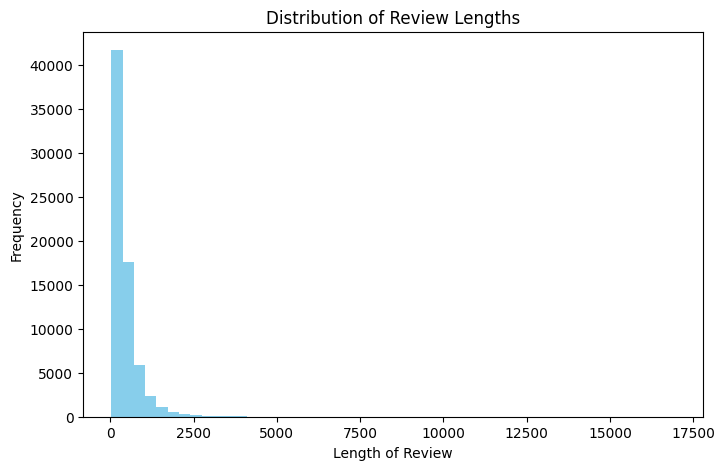

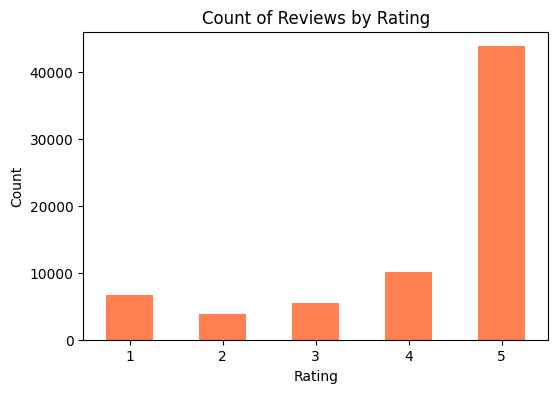

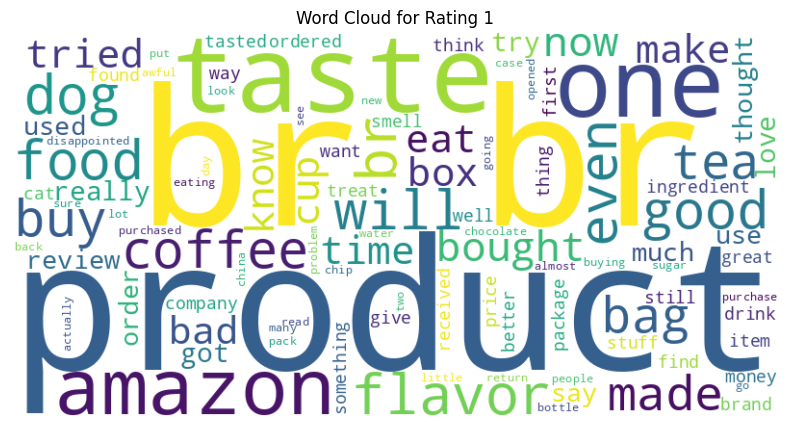

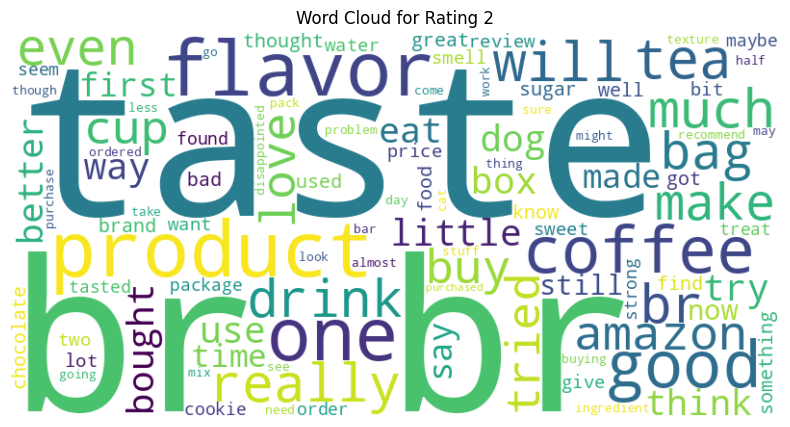

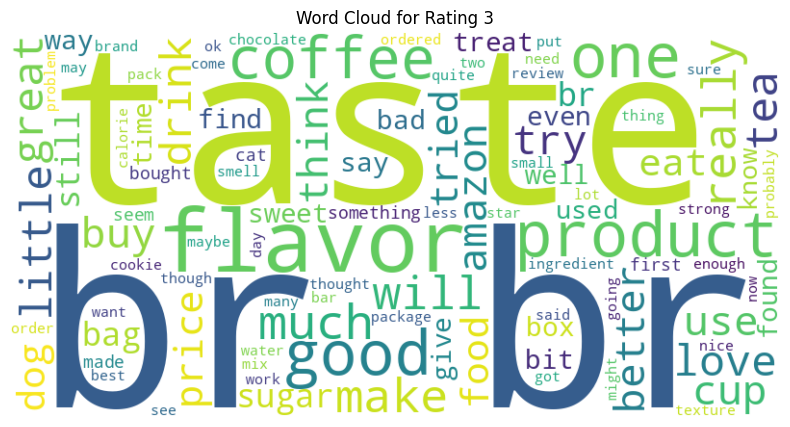

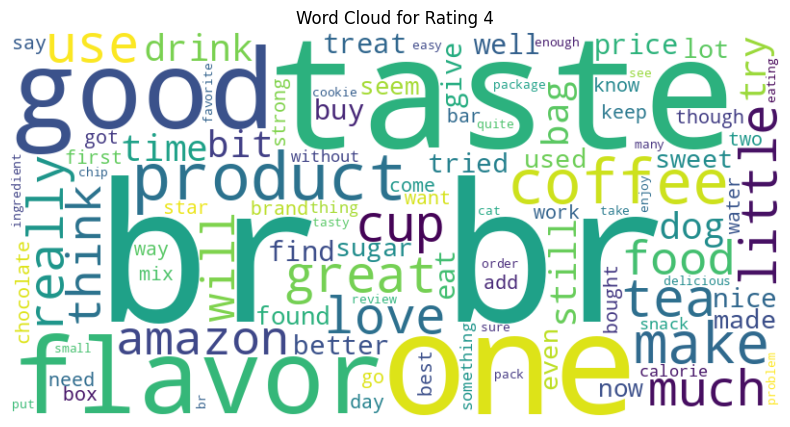

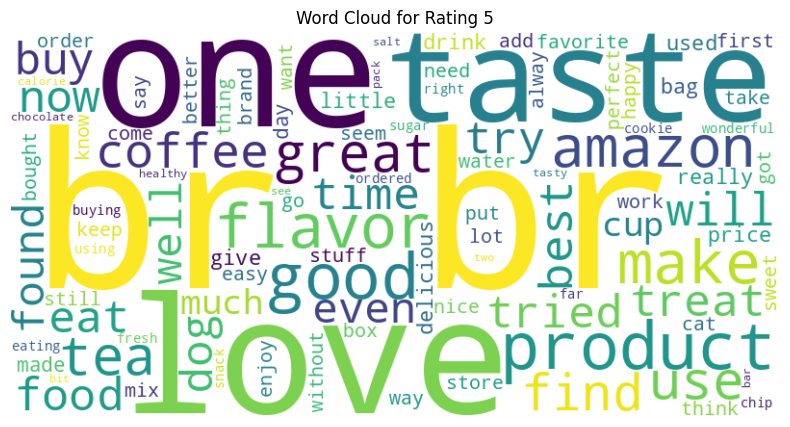

In [54]:
# Calculate the length of each review
data['text_length'] = data['Text_cleaned'].apply(len)

# 1. Distribution of review lengths
plt.figure(figsize=(8, 5))
plt.hist(data['text_length'], bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

# 2. Count of reviews for each rating
rating_counts = data['Score'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
rating_counts.plot(kind='bar', color='coral')
plt.title('Count of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3. Word clouds for each rating
for score in range(1, 6):
    reviews = data[data['Score'] == score]['Text_cleaned']
    all_words = ' '.join(reviews)
    
    if len(all_words) > 0:  # Ensure there are words to generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_words)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Rating {score}')
        plt.show()


preprocessing data

In [55]:
# Filter out neutral reviews (rating = 3) and assign sentiments
data = data[data['Score'] != 3]
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x >= 4 else 0)

/tmp/ipykernel_14494/2584381221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Score'].apply(lambda x: 1 if x >= 4 else 0)


In [56]:
# Function for advanced preprocessing
def advanced_preprocess_text(text):
    text = text.lower()  # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links
    text = re.sub(r"\b\d+\b", "", text)  # removing numbers
    text = re.sub('<.*?>+', '', text)  # removing special characters
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # removing punctuation
    text = re.sub('\n', '', text)  # removing newlines
    text = re.sub('[’“”…]', '', text)  # removing special characters like quotes
    emoji_pattern = re.compile("["                              
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)  # removing emojis


    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)


    return text

# Apply the preprocessing to the text
data['Text_cleaned_advanced'] = data['Text_cleaned'].apply(advanced_preprocess_text)

# Show a sample of the cleaned text
data[['Text', 'Text_cleaned_advanced']].head()


<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipykernel_14494/2111868346.py:4: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # removing URL links


/tmp/ipykernel_14494/2111868346.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Text_cleaned_advanced'] = data['Text_cleaned'].apply(advanced_preprocess_text)


,Text,Text_cleaned_advanced
0,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...
2,This is a confection that has been around a fe...,this is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...,great taffy at a great price there was a wide...


Tokenization 

In [59]:
# Tokenization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X = tfidf_vectorizer.fit_transform(data['Text_cleaned_advanced'])  # Keep X as sparse matrix
y = data['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


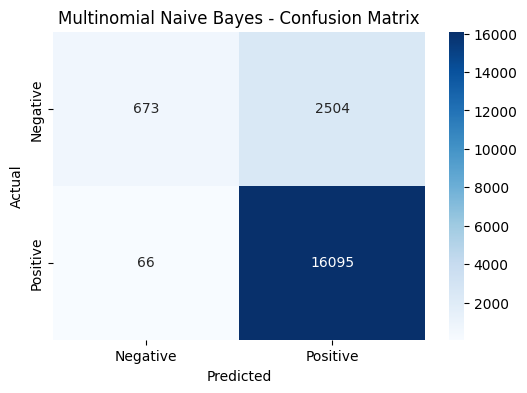

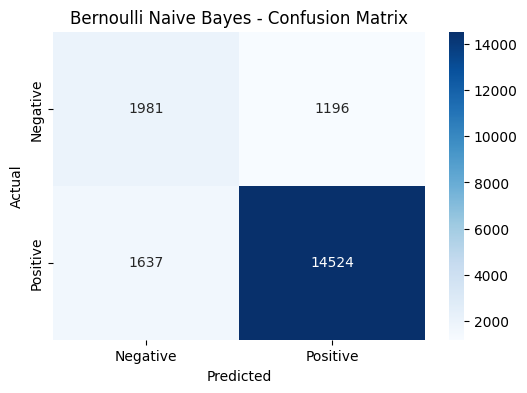

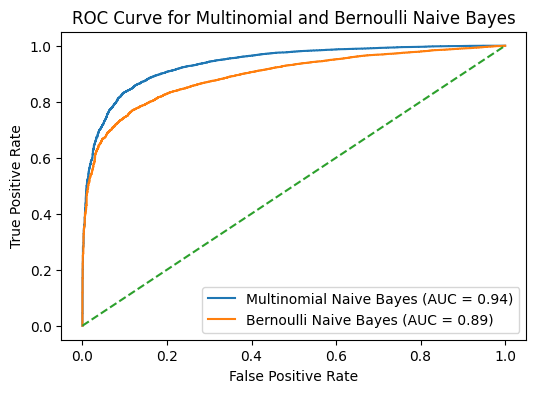

,Accuracy,Precision,Recall,ROC AUC
Multinomial Naive Bayes,0.867101,0.865369,0.995916,0.937697
Bernoulli Naive Bayes,0.853501,0.923919,0.898707,0.893422


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Function to evaluate and store model results
def evaluate_model(model, model_name, results_dict):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Accuracy, Precision, Recall, AUC
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    # Store results in the dictionary
    results_dict[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'ROC AUC': roc_auc
    }
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    return y_pred_proba

# Initialize results dictionary
results = {}

# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb_proba = evaluate_model(mnb, "Multinomial Naive Bayes", results)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb_proba = evaluate_model(bnb, "Bernoulli Naive Bayes", results)

# Step 2: Plot both ROC curves in one visualization
plt.figure(figsize=(6, 4))

# Multinomial Naive Bayes ROC curve
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_proba)
plt.plot(fpr_mnb, tpr_mnb, label='Multinomial Naive Bayes (AUC = {:.2f})'.format(results['Multinomial Naive Bayes']['ROC AUC']))

# Bernoulli Naive Bayes ROC curve
fpr_bnb, tpr_bnb, _ = roc_curve(y_test, bnb_proba)
plt.plot(fpr_bnb, tpr_bnb, label='Bernoulli Naive Bayes (AUC = {:.2f})'.format(results['Bernoulli Naive Bayes']['ROC AUC']))

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multinomial and Bernoulli Naive Bayes')
plt.legend()
plt.show()

# Step 3: Display evaluation table
evaluation_df = pd.DataFrame(results).T
evaluation_df


In [61]:
# data after 

data

,Score,Text,Text_cleaned,text_length,Sentiment,Text_cleaned_advanced
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,263,1,i have bought several of the vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,190,0,product arrived labeled as jumbo salted peanut...
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,509,1,this is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,219,0,if you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...,140,1,great taffy at a great price there was a wide...
...,...,...,...,...,...,...
69993,5,Lambert Kay makes the best dog shampoo and con...,lambert kay makes the best dog shampoo and con...,388,1,lambert kay makes the best dog shampoo and con...
69994,5,I have searched for a conditioner for my Yorks...,i have searched for a conditioner for my yorks...,436,1,i have searched for a conditioner for my yorks...
69995,5,I've been using this for years. While I have ...,i've been using this for years. while i have ...,253,1,ive been using this for years while i have tr...
69996,5,This is the best rinse for dogs that we have e...,this is the best rinse for dogs that we have e...,429,1,this is the best rinse for dogs that we have e...


In [62]:
data.head()

,Score,Text,Text_cleaned,text_length,Sentiment,Text_cleaned_advanced
0,5,I have bought several of the Vitality canned d...,i have bought several of the vitality canned d...,263,1,i have bought several of the vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled as jumbo salted peanut...,190,0,product arrived labeled as jumbo salted peanut...
2,4,This is a confection that has been around a fe...,this is a confection that has been around a fe...,509,1,this is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...,if you are looking for the secret ingredient i...,219,0,if you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...,great taffy at a great price. there was a wid...,140,1,great taffy at a great price there was a wide...
